# 1. Introduction

## Brief overview of the problem.

In this project, I tackle the well-known House Prices: Advanced Regression Techniques competition on Kaggle. The task involves working with a rich dataset that contains various attributes about residential homes in Ames, Iowa.




## Goal

The goal of this project is to predict the final sale price of homes using the provided features such as property characteristics, location details, and quality indicators. This is a supervised regression problem that requires building a model capable of accurately estimating home prices based on structured input data.



# 2. Import Libraries & Load Data


## Import required libraries (pandas, numpy, seaborn, matplotlib, sklearn, etc.)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Load train.csv and test.csv files.


In [2]:
df_train = pd.read_csv("house-prices-data/train.csv")
df_test = pd.read_csv("house-prices-data/test.csv")

## Shape and info of data

In [3]:
# Shape of the datasets.
print(f"shape of training data: {df_train.shape}")
print(f"shape of testing data: {df_test.shape}")      

print()
print()
# Basic info of the datasets.
print(df_train.info())
print()
print()
print(df_test.info())

shape of training data: (1460, 81)
shape of testing data: (1459, 80)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-n

In [4]:
# Summary statistics for numerical features.

# print(df_train.describe())

# 3. Exploratory Data Analysis (EDA)


## a. Data Overview

In [5]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### NOTE: Feature MSSubClass is a nominal categorical feature but expresses stores as integers. Each number is a code that represents a type of dwelling. Hence included in the categorcal_features list.

#### Also, Features OverallQual and OverallCond are ordinal categorical features but stored as integers, they already are natural ranking(10 being excellent)(check if you need to set excellent to 0)

#### Also, Feature ID and target variable SalePrice is not include in either of the lists below.

In [6]:
numerical_features = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
     'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
     'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'YearBuilt',
    'YearRemodAdd', 'GarageYrBlt']


In [7]:
# categorcal_all_features includes ordinal categorical features and nominal categorical features

categorical_all_features = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
    'SaleType', 'SaleCondition'
]


In [8]:
len(df_train.columns) - len(numerical_features) - len(categorical_all_features)

# The remaining are ID and SalePrice feature which are not included.

2

## b. Missing Values

In [9]:
missing = ((df_train.isna()).sum() / len(df_train)) * 100
print(missing[missing > 0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [10]:
zeros = (df_train == 0).sum()
print(zeros[zeros > 0])

MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
2ndFlrSF          829
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
BedroomAbvGr        6
KitchenAbvGr        1
Fireplaces        690
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
dtype: int64


### Imputation strategies

#### LotFrontage

In [11]:
# df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
# # Here x is 'lotfrontage value for one group(one neighborhood).

# df_train['LotFrontage'].isna().sum() / len(df_train) *100

# df["LotFrontage"].value_counts(dropna=False)

##### Checking the distribution of the missing values features for imputing strategies

In [12]:
df_train['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

In [13]:
features_with_missing_values = [
    'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'
]



In [14]:
from scipy.stats import f_oneway

# Drop missing values
lotfrontage_data = df_train[['Neighborhood', 'LotFrontage']].dropna()

# Group values by neighborhood
groups = [group["LotFrontage"].values for name, group in lotfrontage_data.groupby("Neighborhood")]

# Run one-way ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 14.34, p-value: 0.0000


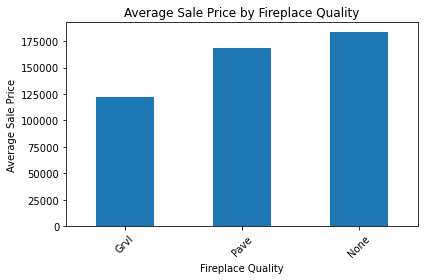

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Temporarily fill missing as 'None' to include in grouping
df_temp = df_train.copy()
df_temp['Alley'] = df_temp['Alley'].fillna('None')

# Group and get mean SalePrice
price_by_fireplace = df_temp.groupby('Alley')['SalePrice'].mean().sort_values()

# Bar plot
price_by_fireplace.plot(kind='bar', title='Average Sale Price by Fireplace Quality')
plt.ylabel('Average Sale Price')
plt.xlabel('Fireplace Quality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4.  Data Processing

## Handling missing data.

In [16]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

df_train['Alley'] = df_train['Alley'].fillna("None")


# MasVnrType already has None and None is the most dominant class, hence did mode imputation by setting na values to None.
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')


# for the line df[df['MasVnrType'].isna() & df['MasVnrArea'] !=0] we get output of 0 rows hence set na values to 0.0
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0.0)



most_common_exposure = df_train['BsmtExposure'].mode()[0]
most_common_type2 = df_train['BsmtFinType2'].mode()[0]
df_train.loc[df_train['BsmtQual'].notna() & df_train['BsmtExposure'].isna(), 'BsmtExposure'] = most_common_exposure
df_train.loc[df_train['BsmtQual'].notna() & df_train['BsmtFinType2'].isna(), 'BsmtFinType2'] = most_common_type2

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('None')
df_train['BsmtCond'] = df_train['BsmtCond'].fillna('None')
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('None')
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('None')
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('None')

df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')


df_train['GarageType'] = df_train['GarageType'].fillna('None')

# NOTE: But then MADE sure the model understands that 0 means “no garage” (e.g., by using an extra binary feature like HasGarage).
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0) 
df_train['GarageFinish'] = df_train['GarageFinish'].fillna('None')
df_train['GarageQual'] = df_train['GarageQual'].fillna('None')
df_train['GarageCond'] = df_train['GarageCond'].fillna('None')



df_train['PoolQC'] = df_train['PoolQC'].fillna('None')
df_train['Fence'] = df_train['Fence'].fillna('None')

# mode imputation is conducted for electrical as there is very dominant class
electrical_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'] = df_train['Electrical'].fillna(electrical_mode)


df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')


In [17]:
missing = ((df_train.isna()).sum() / len(df_train)) * 100
print(missing[missing > 0])

Series([], dtype: float64)


In [18]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Encoding categorical variables

### Ordinal features

In [19]:
ordinal_features = [
    'LotShape', #Ordinal
    'LandContour', #Ordinal bnk higher than hls as its harder to build houses on hls
    'Utilities', #Ordinal(represent increasing levels of utilities access)
    'LandSlope', #Ordinal
    'ExterQual',  # Ordinal
    'ExterCond',  # Ordinal
    'BsmtQual',   # Ordinal
    'BsmtCond',   # Ordinal
    'BsmtExposure', #Ordinal
    'BsmtFinType1', #Ordinal
    'BsmtFinType2', #Ordinal
    'HeatingQC',  # Ordinal
    'CentralAir',   #binary categorical-use booleon mapping (0/1)
    'Electrical', #Ordinal - there is a rank in terms of safety.
    'KitchenQual',  # Ordinal
    'Functional', #Ordinal
    'FireplaceQu',  # Ordinal
    'GarageFinish', #Ordinal
    'GarageQual',  # Ordinal
    'GarageCond',  # Ordinal
    'PavedDrive', #Ordinal
    'PoolQC',  # Ordinal
    'Fence',   # Ordinal
]

In [20]:
LotShape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}

LandContour_map = {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3}

Utilities_map = {'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3}

LandSlope_map = {'Gtl': 0, 'Mod': 1, 'Sev': 2}

ExterQual_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}

ExterCond_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}

BsmtQual_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'None': 5}

BsmtCond_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'None': 5}

BsmtExposure = {'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3, 'None': 4}

BsmtFinType1_map = {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'None': 6}

BsmtFinType2_map = {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5, 'None': 6}

HeatingQC_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}

CentralAir_map = {'Y': 1, 'N': 0}

Electrical_map = {'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4}

KitchenQual_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4}

Functional_map = {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7}

FireplaceQu_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'None': 5}

GarageFinish_map = {'Fin': 0, 'RFn': 1, 'Unf': 2, 'None': 3}

GarageQual_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'None': 5}

GarageCond_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4, 'None': 5}

PavedDrive_map = {'Y': 0, 'P': 1, 'N': 2}

PoolQC_map = {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'None': 4}

Fence_map = {'GdPrv': 0, 'MnPrv': 1, 'GdWo': 2, 'MnWw': 3, 'None': 4}

In [21]:
ordinal_maps = {
    'LotShape': LotShape_map,
    'LandContour': LandContour_map,
    'Utilities': Utilities_map,
    'LandSlope': LandSlope_map,
    'ExterQual': ExterQual_map,
    'ExterCond': ExterCond_map,
    'BsmtQual': BsmtQual_map,
    'BsmtCond': BsmtCond_map,
    'BsmtExposure': BsmtExposure,
    'BsmtFinType1': BsmtFinType1_map,
    'BsmtFinType2': BsmtFinType2_map,
    'HeatingQC': HeatingQC_map,
    'CentralAir': CentralAir_map,
    'Electrical': Electrical_map,
    'KitchenQual': KitchenQual_map,
    'Functional': Functional_map,
    'FireplaceQu': FireplaceQu_map,
    'GarageFinish': GarageFinish_map,
    'GarageQual': GarageQual_map,
    'GarageCond': GarageCond_map,
    'PavedDrive': PavedDrive_map,
    'PoolQC': PoolQC_map,
    'Fence': Fence_map
}

In [22]:
for col in ordinal_features:
    df_train[col] = df_train[col].map(ordinal_maps[col]).astype('int64')

### Nominal features

In [23]:
nominal_features = [
#     'MSSubClass',
    'MSZoning',
    'Street',
    'Alley',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Foundation',
    'Heating',
    'GarageType',
    'MiscFeature',
    'SaleType',
    'SaleCondition'
]

In [24]:
for col in nominal_features:
    uniques = df_train[col].unique()
    print(f"{col} ({len(uniques)} levels): {uniques}")
    print()

MSZoning (5 levels): ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street (2 levels): ['Pave' 'Grvl']

Alley (3 levels): ['None' 'Grvl' 'Pave']

LotConfig (5 levels): ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Neighborhood (25 levels): ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1 (9 levels): ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2 (8 levels): ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType (5 levels): ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle (8 levels): ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle (6 levels): ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl (8 levels): ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

Exterior1st (15 le

In [25]:
len(categorical_all_features)  - len(nominal_features) - len(ordinal_features) #i remove mssubclass feature from nominal_features.

1

In [26]:
# df_train['MSSubClass'] = df_train['MSSubClass'].astype('str').astype('int64')
# df_train = pd.get_dummies(df_train, columns=nominal_features, drop_first=True)

In [27]:
# for col in nominal_features:
#     df_train[col] = df_train[col].astype('category')


In [28]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
# print(df_train['MSSubClass'].dtype)


In [30]:
# Drop target from df
X = df_train.drop(columns=['SalePrice', 'Id'])
y = df_train['SalePrice']

# Convert categorical features to one-hot encoded columns
# X = pd.get_dummies(X, drop_first=True)

# Optional: print to confirm all columns are numeric now
print(X.dtypes.value_counts())

int64      56
object     20
float64     3
dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42 )


In [32]:
for col in nominal_features:
    # take the categories from the TRAIN set as “master”
    cats = X_train[col].astype("category").cat.categories
    # re-cast both train and val to use exactly those categories:
    X_train[col] = pd.Categorical(X_train[col], categories=cats)
    X_val[col]   = pd.Categorical(X_val[col],   categories=cats)


In [33]:
X_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,None,0,0,0,Inside,...,0,0,4,4,None,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,None,1,0,0,Inside,...,0,0,4,4,None,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,None,0,0,0,Inside,...,0,0,4,1,None,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,None,0,0,0,Corner,...,0,0,4,1,None,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,0,0,0,Inside,...,0,0,4,4,None,0,5,2010,WD,Normal


In [34]:
print(categorical_all_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [35]:
#Required for Lightgbm method to work.

for col in nominal_features:
    X_train[col] = X_train[col].astype('category')
    X_val  [col] = X_val  [col].astype('category')

In [36]:
print(X_train.dtypes)

MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
                   ...   
MiscVal             int64
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
Length: 79, dtype: object


In [37]:
y_train_log = np.log1p(y_train)
y_val_log   = np.log1p(y_val)


In [38]:
import lightgbm as lgb
import itertools
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
lgb_train = lgb.Dataset(X_train, label=y_train_log, categorical_feature=nominal_features)

base_params = {
    "objective":      "regression",
    "metric":         "rmse",
    "boosting_type":  "gbdt",
    "seed":           42,
    "verbose":       -1,
    "bagging_freq":   5,   # ← now always on, every 5 rounds

}

param_grid = {
    "num_leaves":       [15, 31, 63],
    "learning_rate":    [0.01, 0.05, 0.1],
    "bagging_fraction": [0.6, 0.8, 1.0],
    "feature_fraction": [0.6, 0.8, 1.0],
}

results = []
for num_leaves, lr, bag_frac, feat_frac in itertools.product(
        param_grid["num_leaves"],
        param_grid["learning_rate"],
        param_grid["bagging_fraction"],
        param_grid["feature_fraction"]):

    params = base_params.copy()
    params.update({
        "num_leaves":       num_leaves,
        "learning_rate":    lr,
        "bagging_fraction": bag_frac,
        "feature_fraction": feat_frac,
    })

    cv_hist = lgb.cv(
        params,
        lgb_train,
        num_boost_round=2000,
        folds=KFold(n_splits=5, shuffle=True, random_state=42),
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(period=50)
        ],
        seed=42
    )

    # inspect this once if you need to
    # print(cv_hist.keys())

    # grab whichever key ends with '-mean'
    mean_key = [k for k in cv_hist if k.endswith('-mean')][0]

    best_iter = len(cv_hist[mean_key])
    best_rmse = np.min(cv_hist[mean_key])

    results.append({
        "num_leaves":       num_leaves,
        "learning_rate":    lr,
        "bagging_fraction": bag_frac,
        "feature_fraction": feat_frac,
        "best_iter":        best_iter,
        "cv_rmse":          best_rmse,
    })

df = pd.DataFrame(results)
print(df.sort_values("cv_rmse").head())


/Users/raymonfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.279709 + 0.0148939
[100]	valid's rmse: 0.214603 + 0.0140801
[150]	valid's rmse: 0.177036 + 0.0140934
[200]	valid's rmse: 0.15602 + 0.0150538
[250]	valid's rmse: 0.143672 + 0.015974
[300]	valid's rmse: 0.136111 + 0.01659
[350]	valid's rmse: 0.1316 + 0.017305
[400]	valid's rmse: 0.128551 + 0.0177358
[450]	valid's rmse: 0.12641 + 0.0179437
[500]	valid's rmse: 0.125139 + 0.018015
[550]	valid's rmse: 0.12443 + 0.0180849
[600]	valid's rmse: 0.123896 + 0.0178925
[650]	valid's rmse: 0.123388 + 0.0178788
[700]	valid's rmse: 0.123009 + 0.0178733
[750]	valid's rmse: 0.122571 + 0.0177551
[800]	valid's rmse: 0.122291 + 0.0176283
[850]	valid's rmse: 0.122263 + 0.0173261
[900]	valid's rmse: 0.121964 + 0.0172125
[950]	valid's rmse: 0.121877 + 0.0171715
[1000]	valid's rmse: 0.121855 + 0.0170529
[1050]	valid's rmse: 0.121669 + 0.017091
[1100]	valid's rmse: 0.121655 + 0.0170133
[1150]	valid's rmse: 0.12162 + 0.0169576
[120

[750]	valid's rmse: 0.123114 + 0.0171613
[800]	valid's rmse: 0.122907 + 0.0170313
[850]	valid's rmse: 0.122748 + 0.0169966
[900]	valid's rmse: 0.12258 + 0.0169296
[950]	valid's rmse: 0.122456 + 0.0168911
[1000]	valid's rmse: 0.122441 + 0.0168235
[1050]	valid's rmse: 0.122387 + 0.0167472
[1100]	valid's rmse: 0.122363 + 0.0166598
[1150]	valid's rmse: 0.122357 + 0.0166053
[1200]	valid's rmse: 0.122277 + 0.0164749
[1250]	valid's rmse: 0.122227 + 0.0163733
[1300]	valid's rmse: 0.122205 + 0.0163457
[1350]	valid's rmse: 0.122211 + 0.0162994
[1400]	valid's rmse: 0.122233 + 0.016258
[1450]	valid's rmse: 0.122275 + 0.0161908
Early stopping, best iteration is:
[1367]	valid's rmse: 0.122195 + 0.0162982
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.280445 + 0.0138428
[100]	valid's rmse: 0.216145 + 0.0123725
[150]	valid's rmse: 0.178279 + 0.0132355
[200]	valid's rmse: 0.15654 + 0.0140417
[250]	valid's rmse: 0.144195 + 0.0147188
[300]	valid's rmse: 0.137306 + 0.01

[200]	valid's rmse: 0.129528 + 0.0184575
[250]	valid's rmse: 0.130289 + 0.0186837
Early stopping, best iteration is:
[168]	valid's rmse: 0.129407 + 0.0188393
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.128003 + 0.0173424
[100]	valid's rmse: 0.125501 + 0.0171104
[150]	valid's rmse: 0.124698 + 0.0163488
[200]	valid's rmse: 0.124298 + 0.0159064
[250]	valid's rmse: 0.124388 + 0.0156326
[300]	valid's rmse: 0.124467 + 0.0152003
[350]	valid's rmse: 0.124485 + 0.0150132
Early stopping, best iteration is:
[276]	valid's rmse: 0.124196 + 0.0153665
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.129791 + 0.0168755
[100]	valid's rmse: 0.127007 + 0.0167951
[150]	valid's rmse: 0.126551 + 0.0161602
[200]	valid's rmse: 0.126162 + 0.0157131
[250]	valid's rmse: 0.126044 + 0.0156221
[300]	valid's rmse: 0.126065 + 0.0153619
[350]	valid's rmse: 0.126015 + 0.0151741
[400]	valid's rmse: 0.125972 + 0.0149371
[450]	valid's rmse: 0.125977 

[50]	valid's rmse: 0.275645 + 0.0138605
[100]	valid's rmse: 0.210026 + 0.0134952
[150]	valid's rmse: 0.172215 + 0.013863
[200]	valid's rmse: 0.151697 + 0.014443
[250]	valid's rmse: 0.14069 + 0.0153666
[300]	valid's rmse: 0.134336 + 0.0158262
[350]	valid's rmse: 0.130451 + 0.0160932
[400]	valid's rmse: 0.128518 + 0.0162153
[450]	valid's rmse: 0.127113 + 0.016391
[500]	valid's rmse: 0.12673 + 0.0162871
[550]	valid's rmse: 0.126136 + 0.0163792
[600]	valid's rmse: 0.125903 + 0.016301
[650]	valid's rmse: 0.125684 + 0.0162464
[700]	valid's rmse: 0.125556 + 0.015918
[750]	valid's rmse: 0.12541 + 0.0156708
[800]	valid's rmse: 0.125261 + 0.0156516
[850]	valid's rmse: 0.125151 + 0.0156286
[900]	valid's rmse: 0.125129 + 0.0154108
[950]	valid's rmse: 0.125028 + 0.0153229
[1000]	valid's rmse: 0.125091 + 0.0153227
Early stopping, best iteration is:
[928]	valid's rmse: 0.125002 + 0.0153114
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.273926 + 0.0147813
[100]	vali

[50]	valid's rmse: 0.13032 + 0.0184131
[100]	valid's rmse: 0.128798 + 0.017403
[150]	valid's rmse: 0.127806 + 0.0168177
[200]	valid's rmse: 0.128159 + 0.0162459
Early stopping, best iteration is:
[143]	valid's rmse: 0.127729 + 0.0170982
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.130865 + 0.0162206
[100]	valid's rmse: 0.12912 + 0.0149472
[150]	valid's rmse: 0.128953 + 0.0137534
[200]	valid's rmse: 0.129539 + 0.0136997
Early stopping, best iteration is:
[104]	valid's rmse: 0.128811 + 0.0150166
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.126528 + 0.016689
[100]	valid's rmse: 0.125252 + 0.0166603
[150]	valid's rmse: 0.125726 + 0.0163927
Early stopping, best iteration is:
[76]	valid's rmse: 0.124983 + 0.0166399
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.128754 + 0.015828
[100]	valid's rmse: 0.128417 + 0.0148203
[150]	valid's rmse: 0.128455 + 0.0143331
Early stopping, best i

[50]	valid's rmse: 0.273472 + 0.0148323
[100]	valid's rmse: 0.206546 + 0.0142896
[150]	valid's rmse: 0.169515 + 0.0147609
[200]	valid's rmse: 0.149532 + 0.0157515
[250]	valid's rmse: 0.138683 + 0.0163711
[300]	valid's rmse: 0.132656 + 0.0168538
[350]	valid's rmse: 0.129035 + 0.0170508
[400]	valid's rmse: 0.126683 + 0.0171249
[450]	valid's rmse: 0.12537 + 0.0171769
[500]	valid's rmse: 0.124493 + 0.0173276
[550]	valid's rmse: 0.123839 + 0.0173507
[600]	valid's rmse: 0.12342 + 0.0173683
[650]	valid's rmse: 0.123221 + 0.0173393
[700]	valid's rmse: 0.123067 + 0.0173322
[750]	valid's rmse: 0.123015 + 0.0172371
[800]	valid's rmse: 0.122936 + 0.0171179
[850]	valid's rmse: 0.122898 + 0.0171247
[900]	valid's rmse: 0.122865 + 0.0171127
[950]	valid's rmse: 0.122844 + 0.0171061
[1000]	valid's rmse: 0.12289 + 0.0170724
[1050]	valid's rmse: 0.122913 + 0.0170609
Early stopping, best iteration is:
[962]	valid's rmse: 0.122839 + 0.0170931
Training until validation scores don't improve for 100 rounds
[50

[50]	valid's rmse: 0.12822 + 0.0163077
[100]	valid's rmse: 0.127481 + 0.0157588
[150]	valid's rmse: 0.127245 + 0.0156577
Early stopping, best iteration is:
[78]	valid's rmse: 0.127168 + 0.0161131
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.131177 + 0.0152709
[100]	valid's rmse: 0.129535 + 0.0151224
[150]	valid's rmse: 0.129956 + 0.014784
[200]	valid's rmse: 0.13054 + 0.0144566
Early stopping, best iteration is:
[101]	valid's rmse: 0.129527 + 0.0151276
    num_leaves  learning_rate  bagging_fraction  feature_fraction  best_iter  \
0           15           0.01               0.6               0.6       1674   
3           15           0.01               0.8               0.6       1401   
27          31           0.01               0.6               0.6       1096   
54          63           0.01               0.6               0.6       1096   
28          31           0.01               0.6               0.8       1245   

     cv_rmse  
0   0.121

In [39]:
y_train_log = np.log1p(y_train)
y_val_log   = np.log1p(y_val)

In [40]:
# … your grid‐search code here … 

# 8) Convert to DataFrame and pick the best row
df = pd.DataFrame(results)
best_row = df.sort_values("cv_rmse").iloc[0]
print("Best CV combo:")
print(best_row)

# 9) Pull out its values
best_leaves = int(best_row["num_leaves"])
best_lr     = best_row["learning_rate"]
best_bfrac  = best_row["bagging_fraction"]
best_fff    = best_row["feature_fraction"]
best_trees  = int(best_row["best_iter"])

# 10) Build the final param dict
final_params = {
    "objective":        "regression",
    "metric":           "rmse",
    "boosting_type":    "gbdt",
    "seed":              42,
    "verbose":          -1,
    "bagging_freq":      5,
    "num_leaves":       best_leaves,
    "learning_rate":    best_lr,
    "bagging_fraction": best_bfrac,
    "feature_fraction": best_fff,
}

# 11) Retrain on the *entire* training set for exactly best_trees rounds
model_final = lgb.train(
    params          = final_params,
    train_set       = lgb.Dataset(
                          X_train, 
                          label=y_train_log, 
                          categorical_feature=nominal_features
                      ),
    num_boost_round = best_trees,
    valid_sets      = [
      lgb.Dataset(X_train, label=y_train_log, categorical_feature=nominal_features),
      lgb.Dataset(X_val,   label=y_val_log,   categorical_feature=nominal_features)
    ],
    valid_names     = ["train","valid"],
    callbacks       = [ lgb.log_evaluation(period=50) ]
)

# # 12) Evaluate on your hold‐out
# y_pred = model_final.predict(X_val)
# rmse   = np.sqrt(mean_squared_error(y_val, y_pred))
# print(f"Final model: {best_trees} trees, RMSE = {rmse:.2f}")

# 12) Predict on your hold‐out, but these are log‐price predictions
log_preds = model_final.predict(X_val, num_iteration=best_trees)

# 13) Invert the log1p transform to get back to dollars
y_pred = np.expm1(log_preds)

# 14) Evaluate on your hold‐out in the original scale
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Final model: {best_trees} trees, RMSE = {rmse:.2f}")

Best CV combo:
num_leaves            15.000000
learning_rate          0.010000
bagging_fraction       0.600000
feature_fraction       0.600000
best_iter           1674.000000
cv_rmse                0.121106
Name: 0, dtype: float64
[50]	train's rmse: 0.274226	valid's rmse: 0.312676
[100]	train's rmse: 0.203379	valid's rmse: 0.238306
[150]	train's rmse: 0.160984	valid's rmse: 0.194707
[200]	train's rmse: 0.135828	valid's rmse: 0.170023
[250]	train's rmse: 0.119757	valid's rmse: 0.155206
[300]	train's rmse: 0.109595	valid's rmse: 0.14634
[350]	train's rmse: 0.102746	valid's rmse: 0.141532
[400]	train's rmse: 0.0974318	valid's rmse: 0.138244
[450]	train's rmse: 0.0935709	valid's rmse: 0.136361
[500]	train's rmse: 0.0900432	valid's rmse: 0.134937
[550]	train's rmse: 0.0870555	valid's rmse: 0.134202
[600]	train's rmse: 0.0842012	valid's rmse: 0.133627
[650]	train's rmse: 0.0818787	valid's rmse: 0.133596
[700]	train's rmse: 0.0796702	valid's rmse: 0.133301
[750]	train's rmse: 0.0771397	valid'

## Feature importance using in-built lightGBM features on gain and split info.

In [41]:
gain  = model_final.feature_importance(importance_type="gain")
split = model_final.feature_importance(importance_type="split")
names = model_final.feature_name()

import pandas as pd
df_imp = (
  pd.DataFrame({
    "feature": names,
    "gain":    gain,
    "split":   split,
  })
  .sort_values("gain", ascending=False)
)
df_imp.head(79)

,feature,gain,split
16,OverallQual,1615.355600,565
45,GrLivArea,964.699361,1554
11,Neighborhood,275.462902,856
18,YearBuilt,233.236002,921
42,1stFlrSF,219.612666,1429
...,...,...,...
44,LowQualFinSF,0.000000,0
73,MiscFeature,0.000000,0
74,MiscVal,0.000000,0
4,Street,0.000000,0


In [42]:

top30 = df_imp["feature"].iloc[:70].tolist()


nominal_top_30 = [f for f in top30 if f in nominal_features]

print(top30)

['OverallQual', 'GrLivArea', 'Neighborhood', 'YearBuilt', '1stFlrSF', 'ExterQual', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'KitchenQual', 'LotArea', 'BsmtFinSF1', 'BsmtQual', 'CentralAir', 'FireplaceQu', 'OverallCond', 'YearRemodAdd', 'GarageYrBlt', '2ndFlrSF', 'GarageFinish', 'LotFrontage', 'OpenPorchSF', 'Fireplaces', 'BsmtFinType1', 'GarageCond', 'BsmtUnfSF', 'TotRmsAbvGrd', 'MasVnrArea', 'MoSold', 'FullBath', 'BsmtExposure', 'MSSubClass', 'WoodDeckSF', 'BsmtCond', 'Functional', 'BedroomAbvGr', 'HalfBath', 'GarageQual', 'YrSold', 'BsmtFullBath', 'Exterior1st', 'HeatingQC', 'LotShape', 'ScreenPorch', 'LandContour', 'GarageType', 'Fence', 'Exterior2nd', 'KitchenAbvGr', 'Electrical', 'PavedDrive', 'EnclosedPorch', 'SaleCondition', 'BsmtFinSF2', 'LotConfig', 'Condition1', 'Foundation', 'ExterCond', 'HouseStyle', 'BsmtFinType2', 'LandSlope', 'MSZoning', 'MasVnrType', 'Alley', 'RoofStyle', 'BsmtHalfBath', 'Utilities', 'Condition2', 'BldgType', 'RoofMatl']


In [43]:
# Drop target from df

# remove_features_imp = ['SalePrice', 'Id'] + 
# X = df_train.drop(columns=['SalePrice', 'Id'])
X = df_train[top30]
y = df_train['SalePrice']


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42 )


In [45]:
for col in nominal_top_30:
    # take the categories from the TRAIN set as “master”
    cats = X_train[col].astype("category").cat.categories
    # re-cast both train and val to use exactly those categories:
    X_train[col] = pd.Categorical(X_train[col], categories=cats)
    X_val[col]   = pd.Categorical(X_val[col],   categories=cats)


In [46]:
#Required for Lightgbm method to work.

for col in nominal_top_30:
    X_train[col] = X_train[col].astype('category')
    X_val  [col] = X_val  [col].astype('category')


In [47]:
import lightgbm as lgb
import itertools
import pandas as pd
import numpy as np

lgb_train = lgb.Dataset(X_train, label=y_train_log, categorical_feature=nominal_top_30)

base_params = {
    "objective":      "regression",
    "metric":         "rmse",
    "boosting_type":  "gbdt",
    "seed":           42,
    "verbose":       -1,
    "bagging_freq":   5,   # ← now always on, every 5 rounds

}

param_grid = {
    "num_leaves":       [15, 31, 63],
    "learning_rate":    [0.01, 0.05, 0.1],
    "bagging_fraction": [0.6, 0.8, 1.0],
    "feature_fraction": [0.6, 0.8, 1.0],
}

results = []
for num_leaves, lr, bag_frac, feat_frac in itertools.product(
        param_grid["num_leaves"],
        param_grid["learning_rate"],
        param_grid["bagging_fraction"],
        param_grid["feature_fraction"]):

    params = base_params.copy()
    params.update({
        "num_leaves":       num_leaves,
        "learning_rate":    lr,
        "bagging_fraction": bag_frac,
        "feature_fraction": feat_frac,
    })

    cv_hist = lgb.cv(
        params,
        lgb_train,
        num_boost_round=2000,
        folds=KFold(n_splits=5, shuffle=True, random_state=42),

        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(period=50)
        ],
        seed=42
    )

    # inspect this once if you need to
    # print(cv_hist.keys())

    # grab whichever key ends with '-mean'
    mean_key = [k for k in cv_hist if k.endswith('-mean')][0]

    best_iter = len(cv_hist[mean_key])
    best_rmse = np.min(cv_hist[mean_key])

    results.append({
        "num_leaves":       num_leaves,
        "learning_rate":    lr,
        "bagging_fraction": bag_frac,
        "feature_fraction": feat_frac,
        "best_iter":        best_iter,
        "cv_rmse":          best_rmse,
    })

df = pd.DataFrame(results)
print(df.sort_values("cv_rmse").head())


Training until validation scores don't improve for 100 rounds


/Users/raymonfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:86: UserWarning: The groups parameter is ignored by KFold
  warnings.warn(


[50]	valid's rmse: 0.279867 + 0.0142831
[100]	valid's rmse: 0.215013 + 0.014073
[150]	valid's rmse: 0.17732 + 0.0142778
[200]	valid's rmse: 0.155984 + 0.0150892
[250]	valid's rmse: 0.14353 + 0.016072
[300]	valid's rmse: 0.136109 + 0.016561
[350]	valid's rmse: 0.131442 + 0.0171867
[400]	valid's rmse: 0.128489 + 0.0174913
[450]	valid's rmse: 0.1264 + 0.0176616
[500]	valid's rmse: 0.125152 + 0.0177364
[550]	valid's rmse: 0.124488 + 0.0178648
[600]	valid's rmse: 0.123797 + 0.0177866
[650]	valid's rmse: 0.123285 + 0.0177157
[700]	valid's rmse: 0.122942 + 0.0177993
[750]	valid's rmse: 0.122558 + 0.0176954
[800]	valid's rmse: 0.122274 + 0.0176915
[850]	valid's rmse: 0.122207 + 0.0174319
[900]	valid's rmse: 0.122055 + 0.0173016
[950]	valid's rmse: 0.121891 + 0.0172562
[1000]	valid's rmse: 0.121873 + 0.0171647
[1050]	valid's rmse: 0.121624 + 0.0171824
[1100]	valid's rmse: 0.121568 + 0.0169748
[1150]	valid's rmse: 0.12149 + 0.0169487
[1200]	valid's rmse: 0.121444 + 0.0169733
[1250]	valid's rmse:

[1000]	valid's rmse: 0.121828 + 0.0163367
[1050]	valid's rmse: 0.121767 + 0.0162735
[1100]	valid's rmse: 0.121758 + 0.0162244
[1150]	valid's rmse: 0.121747 + 0.01621
[1200]	valid's rmse: 0.121749 + 0.0161402
[1250]	valid's rmse: 0.121706 + 0.0160748
[1300]	valid's rmse: 0.121707 + 0.0160111
[1350]	valid's rmse: 0.121687 + 0.0159319
[1400]	valid's rmse: 0.121667 + 0.0159094
[1450]	valid's rmse: 0.121687 + 0.0158455
Early stopping, best iteration is:
[1376]	valid's rmse: 0.121645 + 0.0159101
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.280263 + 0.0142256
[100]	valid's rmse: 0.215871 + 0.0127147
[150]	valid's rmse: 0.177849 + 0.0136105
[200]	valid's rmse: 0.156213 + 0.0143958
[250]	valid's rmse: 0.144112 + 0.0150122
[300]	valid's rmse: 0.13727 + 0.0154154
[350]	valid's rmse: 0.132752 + 0.0154985
[400]	valid's rmse: 0.129782 + 0.0155543
[450]	valid's rmse: 0.128038 + 0.0157569
[500]	valid's rmse: 0.126811 + 0.0158672
[550]	valid's rmse: 0.126007 + 0.01

[50]	valid's rmse: 0.131014 + 0.0150896
[100]	valid's rmse: 0.129059 + 0.0135148
[150]	valid's rmse: 0.128471 + 0.0128375
[200]	valid's rmse: 0.127929 + 0.0122473
[250]	valid's rmse: 0.127679 + 0.0119262
[300]	valid's rmse: 0.127886 + 0.0118535
[350]	valid's rmse: 0.127781 + 0.0118749
Early stopping, best iteration is:
[260]	valid's rmse: 0.127542 + 0.0116725
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.129038 + 0.016691
[100]	valid's rmse: 0.125905 + 0.0164473
[150]	valid's rmse: 0.126248 + 0.0156291
[200]	valid's rmse: 0.126034 + 0.015249
Early stopping, best iteration is:
[101]	valid's rmse: 0.125878 + 0.0165558
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.12807 + 0.0149256
[100]	valid's rmse: 0.125836 + 0.0144282
[150]	valid's rmse: 0.125658 + 0.013568
[200]	valid's rmse: 0.125209 + 0.0133099
[250]	valid's rmse: 0.125554 + 0.0132794
Early stopping, best iteration is:
[195]	valid's rmse: 0.125145 + 0.0133864

[550]	valid's rmse: 0.124167 + 0.0168464
[600]	valid's rmse: 0.123734 + 0.016816
[650]	valid's rmse: 0.123372 + 0.0168735
[700]	valid's rmse: 0.1232 + 0.0168341
[750]	valid's rmse: 0.123082 + 0.0167812
[800]	valid's rmse: 0.123116 + 0.0168344
[850]	valid's rmse: 0.123107 + 0.0168229
Early stopping, best iteration is:
[755]	valid's rmse: 0.123076 + 0.0167995
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.273308 + 0.0148079
[100]	valid's rmse: 0.20745 + 0.0138976
[150]	valid's rmse: 0.170532 + 0.0146926
[200]	valid's rmse: 0.150612 + 0.0152279
[250]	valid's rmse: 0.139693 + 0.0161577
[300]	valid's rmse: 0.133725 + 0.0163362
[350]	valid's rmse: 0.130315 + 0.0162802
[400]	valid's rmse: 0.128238 + 0.0162192
[450]	valid's rmse: 0.126995 + 0.0162935
[500]	valid's rmse: 0.126236 + 0.0163402
[550]	valid's rmse: 0.125662 + 0.016346
[600]	valid's rmse: 0.125343 + 0.0162578
[650]	valid's rmse: 0.125135 + 0.0162256
[700]	valid's rmse: 0.124934 + 0.0160855
[750]	v

[50]	valid's rmse: 0.277988 + 0.0143865
[100]	valid's rmse: 0.212301 + 0.0141185
[150]	valid's rmse: 0.174704 + 0.0145211
[200]	valid's rmse: 0.153958 + 0.0151284
[250]	valid's rmse: 0.141956 + 0.0159762
[300]	valid's rmse: 0.134985 + 0.0164627
[350]	valid's rmse: 0.130676 + 0.0170528
[400]	valid's rmse: 0.127955 + 0.0172605
[450]	valid's rmse: 0.125935 + 0.0173636
[500]	valid's rmse: 0.124763 + 0.0173651
[550]	valid's rmse: 0.124081 + 0.0173802
[600]	valid's rmse: 0.123348 + 0.0173393
[650]	valid's rmse: 0.122843 + 0.0173117
[700]	valid's rmse: 0.122536 + 0.0174307
[750]	valid's rmse: 0.122176 + 0.0173126
[800]	valid's rmse: 0.122019 + 0.0172645
[850]	valid's rmse: 0.121985 + 0.0169908
[900]	valid's rmse: 0.121856 + 0.0168101
[950]	valid's rmse: 0.121735 + 0.0168694
[1000]	valid's rmse: 0.121714 + 0.0167404
[1050]	valid's rmse: 0.121527 + 0.0167967
[1100]	valid's rmse: 0.121397 + 0.016694
[1150]	valid's rmse: 0.12132 + 0.0167424
[1200]	valid's rmse: 0.121338 + 0.016701
[1250]	valid's 

[400]	valid's rmse: 0.128234 + 0.0165716
[450]	valid's rmse: 0.126999 + 0.0166624
[500]	valid's rmse: 0.126185 + 0.0167037
[550]	valid's rmse: 0.125709 + 0.0166021
[600]	valid's rmse: 0.125397 + 0.0165255
[650]	valid's rmse: 0.125051 + 0.0164418
[700]	valid's rmse: 0.124944 + 0.0163595
[750]	valid's rmse: 0.124898 + 0.016345
[800]	valid's rmse: 0.124872 + 0.0163739
[850]	valid's rmse: 0.124897 + 0.0163501
Early stopping, best iteration is:
[792]	valid's rmse: 0.124856 + 0.0163649
Training until validation scores don't improve for 100 rounds
[50]	valid's rmse: 0.273558 + 0.0143731
[100]	valid's rmse: 0.208207 + 0.0128665
[150]	valid's rmse: 0.17098 + 0.013579
[200]	valid's rmse: 0.151413 + 0.0144825
[250]	valid's rmse: 0.141114 + 0.0150376
[300]	valid's rmse: 0.13556 + 0.0155319
[350]	valid's rmse: 0.132231 + 0.0154599
[400]	valid's rmse: 0.130333 + 0.0154293
[450]	valid's rmse: 0.129315 + 0.0153242
[500]	valid's rmse: 0.12869 + 0.0154069
[550]	valid's rmse: 0.128234 + 0.0153212
[600]	v

In [48]:
y_train_log = np.log1p(y_train)
y_val_log   = np.log1p(y_val)

In [49]:
# … your grid‐search code here … 

# 8) Convert to DataFrame and pick the best row
df = pd.DataFrame(results)
best_row = df.sort_values("cv_rmse").iloc[0]
print("Best CV combo:")
print(best_row)

# 9) Pull out its values
best_leaves = int(best_row["num_leaves"])
best_lr     = best_row["learning_rate"]
best_bfrac  = best_row["bagging_fraction"]
best_fff    = best_row["feature_fraction"]
best_trees  = int(best_row["best_iter"])

# 10) Build the final param dict
final_params = {
    "objective":        "regression",
    "metric":           "rmse",
    "boosting_type":    "gbdt",
    "seed":              42,
    "verbose":          -1,
    "bagging_freq":      5,
    "num_leaves":       best_leaves,
    "learning_rate":    best_lr,
    "bagging_fraction": best_bfrac,
    "feature_fraction": best_fff,
}

# 11) Retrain on the *entire* training set for exactly best_trees rounds
model_final = lgb.train(
    params          = final_params,
    train_set       = lgb.Dataset(
                          X_train, 
                          label=y_train_log, 
                          categorical_feature=nominal_top_30
                      ),
    num_boost_round = best_trees,
    valid_sets      = [
      lgb.Dataset(X_train, label=y_train_log, categorical_feature=nominal_top_30),
      lgb.Dataset(X_val,   label=y_val_log,   categorical_feature=nominal_top_30)
    ],
    valid_names     = ["train","valid"],
    callbacks       = [ lgb.log_evaluation(period=50) ]
)

# 12) Evaluate on your hold‐out
# y_pred = model_final.predict(X_val)
# rmse   = np.sqrt(mean_squared_error(y_val, y_pred))
# print(f"Final model: {best_trees} trees, RMSE = {rmse:.2f}")


# 12) Predict on your hold‐out, but these are log‐price predictions
log_preds = model_final.predict(X_val, num_iteration=best_trees)

# 13) Invert the log1p transform to get back to dollars
y_pred = np.expm1(log_preds)

# 14) Evaluate on your hold‐out in the original scale
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Final model: {best_trees} trees, RMSE = {rmse:.2f}")

Best CV combo:
num_leaves            31.000000
learning_rate          0.010000
bagging_fraction       0.600000
feature_fraction       0.600000
best_iter           1410.000000
cv_rmse                0.121112
Name: 27, dtype: float64
[50]	train's rmse: 0.26977	valid's rmse: 0.309719
[100]	train's rmse: 0.19642	valid's rmse: 0.234923
[150]	train's rmse: 0.153716	valid's rmse: 0.191737
[200]	train's rmse: 0.128425	valid's rmse: 0.16809
[250]	train's rmse: 0.112723	valid's rmse: 0.153649
[300]	train's rmse: 0.102819	valid's rmse: 0.145636
[350]	train's rmse: 0.0960947	valid's rmse: 0.141289
[400]	train's rmse: 0.0908282	valid's rmse: 0.13837
[450]	train's rmse: 0.0868559	valid's rmse: 0.136809
[500]	train's rmse: 0.0830575	valid's rmse: 0.135227
[550]	train's rmse: 0.0798482	valid's rmse: 0.134614
[600]	train's rmse: 0.0767323	valid's rmse: 0.134014
[650]	train's rmse: 0.0741163	valid's rmse: 0.133943
[700]	train's rmse: 0.0716097	valid's rmse: 0.133639
[750]	train's rmse: 0.0689761	valid's

# Predicting house princes of on testing dataset.

In [76]:
X_test = df_test.copy()
X_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [80]:
X_test['LotFrontage'] = X_test.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

X_test['Alley'] = X_test['Alley'].fillna("None")


# MasVnrType already has None and None is the most dominant class, hence did mode imputation by setting na values to None.
X_test['MasVnrType'] = X_test['MasVnrType'].fillna('None')


# for the line df[df['MasVnrType'].isna() & df['MasVnrArea'] !=0] we get output of 0 rows hence set na values to 0.0
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0.0)


most_common_exposure = X_test['BsmtExposure'].mode()[0]
most_common_type2 = X_test['BsmtFinType2'].mode()[0]
X_test.loc[X_test['BsmtQual'].notna() & X_test['BsmtExposure'].isna(), 'BsmtExposure'] = most_common_exposure
X_test.loc[X_test['BsmtQual'].notna() & X_test['BsmtFinType2'].isna(), 'BsmtFinType2'] = most_common_type2

X_test['BsmtQual'] = X_test['BsmtQual'].fillna('None')
X_test['BsmtCond'] = X_test['BsmtCond'].fillna('None')
X_test['BsmtExposure'] = X_test['BsmtExposure'].fillna('None')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].fillna('None')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].fillna('None')

X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna('None')


X_test['GarageType'] = X_test['GarageType'].fillna('None')

# NOTE: But then MADE sure the model understands that 0 means “no garage” (e.g., by using an extra binary feature like HasGarage).
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(0) 
X_test['GarageFinish'] = X_test['GarageFinish'].fillna('None')
X_test['GarageQual'] = X_test['GarageQual'].fillna('None')
X_test['GarageCond'] = X_test['GarageCond'].fillna('None')

X_test['PoolQC'] = X_test['PoolQC'].fillna('None')
X_test['Fence'] = X_test['Fence'].fillna('None')

# mode imputation is conducted for electrical as there is very dominant class
electrical_mode = X_test['Electrical'].mode()[0]
X_test['Electrical'] = X_test['Electrical'].fillna(electrical_mode)


X_test['MiscFeature'] = X_test['MiscFeature'].fillna('None')

In [82]:
# 1) Define your fill strategies
mode_fill_cols = [
    "MSZoning",
    "Utilities",
    "Exterior1st",
    "Exterior2nd",
    "KitchenQual",
    "Functional",
    "SaleType",
]
zero_fill_cols = [
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "BsmtFullBath",
    "BsmtHalfBath",
    "GarageCars",
    "GarageArea",
]

for col in mode_fill_cols:
    # compute the mode on non‐missing values
    mode_val = X_test[col].mode()[0]
    X_test[col] = X_test[col].fillna(mode_val)


print()
# 3) Zero‐impute the numeric basement/garage fields
X_test[zero_fill_cols] = X_test[zero_fill_cols].fillna(0)

# 4) (Optional) Cast your “quality” fields to ordered categorical or numeric
#    e.g. KitchenQual: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
# qual_map = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
# for col in ["KitchenQual"]:
#     X_test[col] = X_test[col].map(qual_map).astype(int)


In [85]:
# 2.1) Select the features and copy
X_test_n = X_test[top30].copy()  

# 2.2) Confirm the dtypes
print(X_test_n.dtypes.to_string())
# every one should be "category"

OverallQual        int64
GrLivArea          int64
Neighborhood      object
YearBuilt          int64
1stFlrSF           int64
ExterQual         object
TotalBsmtSF      float64
GarageArea       float64
GarageCars       float64
KitchenQual       object
LotArea            int64
BsmtFinSF1       float64
BsmtQual          object
CentralAir        object
FireplaceQu       object
OverallCond        int64
YearRemodAdd       int64
GarageYrBlt      float64
2ndFlrSF           int64
GarageFinish      object
LotFrontage      float64
OpenPorchSF        int64
Fireplaces         int64
BsmtFinType1      object
GarageCond        object
BsmtUnfSF        float64
TotRmsAbvGrd       int64
MasVnrArea       float64
MoSold             int64
FullBath           int64
BsmtExposure      object
MSSubClass         int64
WoodDeckSF         int64
BsmtCond          object
Functional        object
BedroomAbvGr       int64
HalfBath           int64
GarageQual        object
YrSold             int64
BsmtFullBath     float64


In [87]:
new_ordinal_features = [col for col in X_test_n if col in ordinal_features]

In [92]:
for col in nominal_top_30:
    X_test_n[col] = X_test_n[col].astype('category')


In [94]:
for col in new_ordinal_features:
    X_test_n[col] = X_test_n[col].map(ordinal_maps[col]).astype('int64')

In [97]:
print(X_test_n.dtypes.to_string())


OverallQual         int64
GrLivArea           int64
Neighborhood     category
YearBuilt           int64
1stFlrSF            int64
ExterQual           int64
TotalBsmtSF       float64
GarageArea        float64
GarageCars        float64
KitchenQual         int64
LotArea             int64
BsmtFinSF1        float64
BsmtQual            int64
CentralAir          int64
FireplaceQu         int64
OverallCond         int64
YearRemodAdd        int64
GarageYrBlt       float64
2ndFlrSF            int64
GarageFinish        int64
LotFrontage       float64
OpenPorchSF         int64
Fireplaces          int64
BsmtFinType1        int64
GarageCond          int64
BsmtUnfSF         float64
TotRmsAbvGrd        int64
MasVnrArea        float64
MoSold              int64
FullBath            int64
BsmtExposure        int64
MSSubClass          int64
WoodDeckSF          int64
BsmtCond            int64
Functional          int64
BedroomAbvGr        int64
HalfBath            int64
GarageQual          int64
YrSold      

In [99]:
log_preds_test = model_final.predict(
    X_test_n,
    num_iteration=best_trees
)
preds_test = np.expm1(log_preds_test)


In [100]:
preds_test = np.expm1(log_preds_test)


In [102]:
submission = pd.DataFrame({
    "Id":        df_test["Id"],
    "SalePrice": preds_test
})
submission.to_csv("submission.csv", index=False)


In [103]:
print(submission.head())
print(submission["SalePrice"].describe())


     Id      SalePrice
0  1461  125168.844030
1  1462  155894.921116
2  1463  186911.584651
3  1464  192401.389432
4  1465  190118.877202
count      1459.000000
mean     176814.130901
std       74100.066678
min       55507.957247
25%      127535.799334
50%      156738.327756
75%      207509.715194
max      496502.217806
Name: SalePrice, dtype: float64
